# Importing Dependencies

In [1]:
import tqdm
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

# Collecting the dataset

In [2]:
train_set = torchvision.datasets.FashionMNIST(
root='', train=True,
download=True, 
transform=transforms.Compose([
    transforms.ToTensor()
]))



In [3]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [4]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [5]:
for i in train_loader:
    print(i)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

## Visualising

In [6]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [7]:
len(train_set)

60000

In [8]:
train_set.train_labels

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
train_set.train_labels.bincount() #balance data set

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

Read more about Balance and Imbalance dataset in this paper <b><a href = 'https://arxiv.org/abs/1710.05381'> A systematic study of the class imbalance problem in convolutional neural networks </a></b>

In [10]:
sample = next(iter(train_set))
len(sample)

2

In [11]:
type(sample)

tuple

In [12]:
image, label = sample

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

9

label:  9


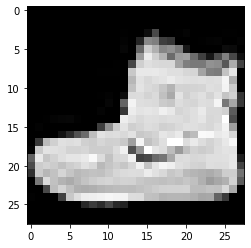

In [15]:
plt.imshow(image.squeeze(), cmap='gray')
print('label: ', label)

In [16]:
batch = next(iter(train_loader))
len(batch)

2

In [17]:
images, labels = batch

In [18]:
images.shape

torch.Size([10, 1, 28, 28])

In [19]:
labels.shape

torch.Size([10])

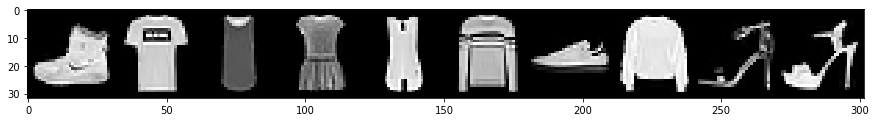

In [20]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

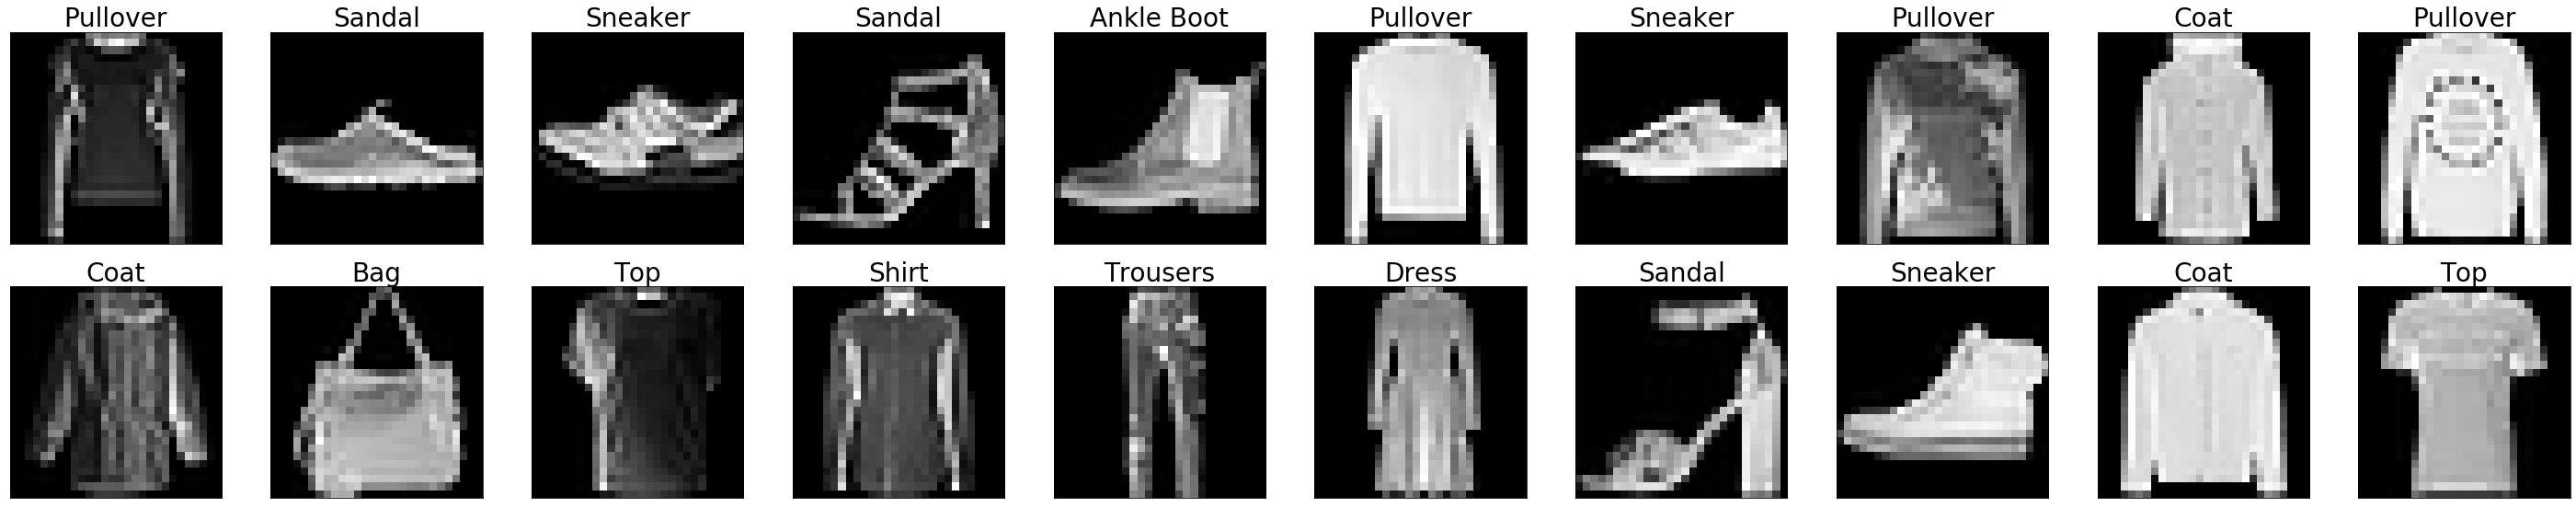

In [21]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

mapping = {
    0:'Top', 1:'Trousers', 2:'Pullover', 3:'Dress', 4:'Coat'
    ,5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'
}

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    fig = plt.imshow(image.reshape(28,28), cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(mapping[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

# Building the ConvNets

In [22]:
class ConvNets(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, #depends upons the color channel
                                     out_channels=6, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(in_channels=6, 
                                     out_channels=12, kernel_size=5)
        
        #make sure you flatten the image
        
        self.fc1 = torch.nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120, out_features=60)
        self.out = torch.nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        #implement forward pass
        return t

In [23]:
net = ConvNets()
net

ConvNets(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

## Building the full architcture

In [24]:
#lets try again

class ConvNets(torch.nn.Module):
    
    def __init__(self):
        super(ConvNets,self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, #depends upons the color channel
                                     out_channels=6, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(in_channels=6, 
                                     out_channels=12, kernel_size=5)
        
        #make sure you flatten the image
        
        self.fc1 = torch.nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120, out_features=60)
        self.out = torch.nn.Linear(in_features=60, out_features=10)
        
        
    def forward(self, t): #Forward propagation 
        t = t
        
        
        #hidden layer 1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #hidden layer 2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #hidden layer 3 -- Linear Layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        

        t = self.fc2(t)
        t = F.relu(t)
        
        #hidden layer 4 -- Linear Layer
        t = self.out(t)
#         t = F.softmax(t, dim=1)
        
        return t 
        
    def __repr__(self):
        return f'ConvNet architure'
    

In [25]:
net = ConvNets()

In [26]:
net

ConvNet architure

In [27]:
net.conv1.weight

Parameter containing:
tensor([[[[ 0.0886,  0.1069,  0.1000, -0.1063,  0.0504],
          [ 0.0665,  0.1549,  0.0946,  0.1066, -0.1305],
          [-0.0262,  0.1030,  0.1360,  0.1180,  0.1342],
          [-0.0084,  0.1474,  0.1136,  0.0197, -0.0378],
          [-0.1266, -0.0852,  0.1066,  0.1412, -0.0122]]],


        [[[-0.1718, -0.0740, -0.1738, -0.0104,  0.1757],
          [-0.1134,  0.1943, -0.1822, -0.1858, -0.1065],
          [-0.0992,  0.1044, -0.0247, -0.0349,  0.1892],
          [ 0.1164,  0.1210, -0.0628, -0.0156, -0.0623],
          [-0.0398,  0.1477,  0.1408,  0.0950,  0.1769]]],


        [[[-0.0943, -0.0168,  0.0288, -0.1047,  0.0206],
          [-0.1309, -0.1657, -0.1867, -0.1242,  0.1837],
          [-0.0979,  0.1425,  0.0607,  0.0868,  0.1582],
          [-0.0281, -0.1386,  0.0450,  0.1656, -0.1436],
          [ 0.0944, -0.0308,  0.1286, -0.1025, -0.1980]]],


        [[[-0.0983, -0.1990, -0.0877, -0.0947,  0.1474],
          [-0.0948, -0.1330, -0.1401,  0.0451,  0.0927

In [28]:
net.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [29]:
for name in net.named_parameters():
    print(name)

('conv1.weight', Parameter containing:
tensor([[[[ 0.0886,  0.1069,  0.1000, -0.1063,  0.0504],
          [ 0.0665,  0.1549,  0.0946,  0.1066, -0.1305],
          [-0.0262,  0.1030,  0.1360,  0.1180,  0.1342],
          [-0.0084,  0.1474,  0.1136,  0.0197, -0.0378],
          [-0.1266, -0.0852,  0.1066,  0.1412, -0.0122]]],


        [[[-0.1718, -0.0740, -0.1738, -0.0104,  0.1757],
          [-0.1134,  0.1943, -0.1822, -0.1858, -0.1065],
          [-0.0992,  0.1044, -0.0247, -0.0349,  0.1892],
          [ 0.1164,  0.1210, -0.0628, -0.0156, -0.0623],
          [-0.0398,  0.1477,  0.1408,  0.0950,  0.1769]]],


        [[[-0.0943, -0.0168,  0.0288, -0.1047,  0.0206],
          [-0.1309, -0.1657, -0.1867, -0.1242,  0.1837],
          [-0.0979,  0.1425,  0.0607,  0.0868,  0.1582],
          [-0.0281, -0.1386,  0.0450,  0.1656, -0.1436],
          [ 0.0944, -0.0308,  0.1286, -0.1025, -0.1980]]],


        [[[-0.0983, -0.1990, -0.0877, -0.0947,  0.1474],
          [-0.0948, -0.1330, -0.1401,

In [30]:
for name, param in net.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


<code> > network.conv1
Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)) </code>

<p> The two main take always about these convolutional layers is that our filters are represented using a single tensor and that each filter inside the tensor also has a depth that accounts for the input channels that are being convolved.
    
    - All filters [kernels] are represented using a single tensor.
    - Filters have depth that accounts for the input channels.
Our tensors are rank-4 tensors. The first axis represents the number of filters. The second axis represents the depth of each filter which corresponds to the number of input channels being convolved.

The last two axes represent the height and width of each filter. We can pull out any single filter by indexing into the weight tensor’s first axis.


 

In [31]:
net(image)

tensor([[-0.0291, -0.0539,  0.1406,  0.0693, -0.0143, -0.1262,  0.0953,  0.0315,  0.1056, -0.1318]],
       grad_fn=<AddmmBackward>)

In [32]:
output = net(image); output

tensor([[-0.0291, -0.0539,  0.1406,  0.0693, -0.0143, -0.1262,  0.0953,  0.0315,  0.1056, -0.1318]],
       grad_fn=<AddmmBackward>)

In [33]:
def get_num_correct(pred, labels): 
    return preds.argmax(dim=1).eq(labels).sum().item()

In [34]:
images.unsqueeze(0).shape

torch.Size([1, 10, 1, 28, 28])

In [35]:
preds = net(images)
loss = F.cross_entropy(preds, labels) #calculate the gradient
loss.item()

2.321357488632202

In [36]:
net.conv1.weight.grad

In [37]:
loss.backward()

In [38]:
net.conv1.weight.grad

tensor([[[[-4.7500e-03, -4.4885e-03, -3.6707e-03, -5.1799e-03, -3.6612e-03],
          [-2.9597e-03, -3.1644e-03, -2.7867e-03, -5.3999e-03, -6.2313e-03],
          [-2.5785e-03, -2.1669e-03, -3.1753e-03, -5.1967e-03, -4.0573e-03],
          [-2.2860e-03, -1.4609e-03, -2.4905e-03, -5.6641e-03, -3.4508e-03],
          [-2.0538e-03, -1.9480e-03, -3.8869e-03, -4.5944e-03, -2.8700e-03]]],


        [[[-2.2853e-03, -6.3947e-03, -7.0136e-03, -7.8969e-03, -8.2994e-03],
          [-8.1061e-04, -1.6864e-03, -4.0961e-03, -6.7869e-03, -6.3989e-03],
          [-8.3790e-05, -1.9670e-03, -5.0666e-03, -9.3678e-03, -6.8440e-03],
          [-1.9294e-03, -4.6288e-03, -4.5023e-03, -5.6898e-03, -6.6484e-03],
          [-1.0918e-03, -3.8481e-03, -2.9940e-03, -5.4493e-03, -6.8668e-03]]],


        [[[-2.1264e-04,  6.1422e-04,  1.9814e-03,  2.2052e-03,  3.2704e-03],
          [ 7.5623e-04,  1.1812e-03,  1.7708e-03,  2.4799e-03,  4.3785e-03],
          [ 8.8846e-04,  2.2051e-03,  3.9398e-03,  4.2604e-03,  5.07

In [39]:
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [40]:
loss.item()

2.321357488632202

In [41]:
get_num_correct(preds, labels)

2

In [42]:
optimizer.step()

In [43]:
preds = net(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.121960401535034

In [44]:
get_num_correct(preds, labels)

4

In [45]:
network = ConvNets()

preds = network(images)
loss = F.cross_entropy(preds, labels)

optimizer = optim.Adam(net.parameters(), lr=0.07)

loss.backward() #gradient 
optimizer.step() #update 

#---------------------

print('loss1:', loss.item())

loss1: 2.304940938949585


In [46]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss2: 2.304940938949585


# Training in a loop

In [ ]:
network = ConvNets()

for epoch in (range(5)):
    
    total_loss = 0
    total_correct = 0
    
    for batch in tqdm.tqdm(train_loader):
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print('epoch', epoch, 'total_correct:', total_correct, 
         'loss:', total_loss)
    break


  3%|▎         | 1709/60000 [00:08<04:34, 212.32it/s]

In [ ]:
total_correct / len(train_set)